In [ ]:
!pip install gensim

In [ ]:
#사전 훈련된 임베딩을 사용하지 않는 경우
import numpy as np
from collections import Counter
import gensim

#문장과 레이블 데이터
sentences = ['nice great best amazing', 'stop lies', 'pitiful nerd', 'excellent work', 'supreme quality', 'bad', 'highly respectable']
y_train = [1, 0, 0, 1, 1, 0, 1]

#토큰화
tokenized_sentences = [sent.split() for sent in sentences]
print('단어 토큰화된 결과 :', tokenized_sentences)

단어 토큰화된 결과 : [['nice', 'great', 'best', 'amazing'], ['stop', 'lies'], ['pitiful', 'nerd'], ['excellent', 'work'], ['supreme', 'quality'], ['bad'], ['highly', 'respectable']]


In [ ]:
#토큰화된 결과로 단어 집합 생성
word_list = []
for sent in tokenized_sentences:
    for word in sent:
        word_list.append(word)

word_counts = Counter(word_list)
print('총 단어수 :', len(word_counts))

총 단어수 : 15


In [ ]:
#등장 빈도순 정렬
vocab = sorted(word_counts, key=word_counts.get, reverse=True)
print(vocab)

['nice', 'great', 'best', 'amazing', 'stop', 'lies', 'pitiful', 'nerd', 'excellent', 'work', 'supreme', 'quality', 'bad', 'highly', 'respectable']


In [ ]:
#용도 할당
word_to_index = {}
word_to_index['<PAD>']=0
word_to_index['<UNK>']=1

for index, word in enumerate(vocab):
    word_to_index[word] = index +2

vocab_size = len(word_to_index)
print('패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기 :', vocab_size)

패딩 토큰, UNK 토큰을 고려한 단어 집합의 크기 : 17


In [ ]:
print(word_to_index)

{'<PAD>': 0, '<UNK>': 1, 'nice': 2, 'great': 3, 'best': 4, 'amazing': 5, 'stop': 6, 'lies': 7, 'pitiful': 8, 'nerd': 9, 'excellent': 10, 'work': 11, 'supreme': 12, 'quality': 13, 'bad': 14, 'highly': 15, 'respectable': 16}


In [ ]:
#단어 집합을 이용하여 정수 인코딩
def texts_to_sequences(tokenized_X_data, word_to_index):
    encoded_X_data = []
    for sent in tokenized_X_data:
        index_sequences = []
        for word in sent:
            try:
                index_sequences.append(word_to_index[word])
            except KeyError:
                index_sequences.append(word_to_index['<UNK>'])
        encoded_X_data.append(index_sequences)
    return encoded_X_data

X_encoded = texts_to_sequences(tokenized_sentences, word_to_index)
print(X_encoded)

[[2, 3, 4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14], [15, 16]]


In [ ]:
#최대길이
max_len = max(len(l) for l in X_encoded)
print('최대길이:',max_len)

최대길이: 4


In [ ]:
#최대길이로 패딩
def pad_sequences(sentences, max_len):
    features = np.zeros((len(sentences), max_len), dtype=int)
    for index, sentence in enumerate(sentences):
        if len(sentence) !=0:
            features[index, :len(sentence)] = np.array(sentence)[:max_len]
    return features

X_train = pad_sequences(X_encoded, max_len = max_len)
y_train = np.array(y_train)
print('패딩 결과:')
print(X_train)

패딩 결과:
[[ 2  3  4  5]
 [ 6  7  0  0]
 [ 8  9  0  0]
 [10 11  0  0]
 [12 13  0  0]
 [14  0  0  0]
 [15 16  0  0]]


In [ ]:
#모델 설계
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils. data import DataLoader, TensorDataset

class SimpleModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SimpleModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(embedding_dim * max_len, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        flattened = self.flatten(embedded)
        output = self.fc(flattened)
        return self.sigmoid(output)

#모델 객체 선언
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )

#임베딩 벡터의 크기 100
embedding_dim = 100
simple_model = SimpleModel(vocab_size, embedding_dim).to(device)

In [ ]:
#손실함수
criterion = nn.BCELoss()
optimizer = Adam(simple_model.parameters())

#데이터로더
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long),
                              torch.tensor(y_train, dtype=torch.float32))
train_dataloader = DataLoader(train_dataset, batch_size=2)

In [ ]:
print(len(train_dataloader))

4


In [ ]:
#10번 학습
for epoch in range(10):
    for inputs, targets in train_dataloader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        outputs = simple_model(inputs).view(-1)

        loss = criterion(outputs, targets)
        loss.backward()

        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.6960276961326599
Epoch 2, Loss: 0.6110844016075134
Epoch 3, Loss: 0.5048335194587708
Epoch 4, Loss: 0.4094398617744446
Epoch 5, Loss: 0.3332135081291199
Epoch 6, Loss: 0.2756395637989044
Epoch 7, Loss: 0.2330792099237442
Epoch 8, Loss: 0.20145991444587708
Epoch 9, Loss: 0.17734508216381073
Epoch 10, Loss: 0.1581956297159195


In [ ]:
## 사전 훈련된 임베딩을 사용
!pip install gdown
!gdown https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j

Downloading...
From (original): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j
From (redirected): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j&confirm=t&uuid=0bc39f46-7bcc-4754-87c0-795cde7f22a5
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:32<00:00, 50.4MB/s]


In [ ]:
#구글의 사전 훈련된 Word2vec 모델을 로드
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary = True)

In [ ]:
#임베딩
embedding_matrix = np.zeros((vocab_size, 300))
print('임베딩 행렬의 크기 :', embedding_matrix.shape)

임베딩 행렬의 크기 : (17, 300)


In [ ]:
#함수 정의
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [ ]:
#맵핑
for word, i in word_to_index.items():
    if i >2:
        temp = get_vector(word)
        if temp is not None:
            embedding_matrix[i] = temp

In [ ]:
print(embedding_matrix[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
word_to_index['great']

3

In [ ]:
np.all(word2vec_model['great'] == embedding_matrix[3])

True

In [ ]:
#모델 구현
class PretrainedEmbeddingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(PretrainedEmbeddingModel, self).__init__()
        self.embedding =nn.Embedding(vocab_size, embedding_dim)
        self.embeddingweight = nn.Parameter(torch.tensor(embedding_matrix,
                                                         dtype=torch.float32))
        self.embedding.weight.requires_grad = True
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(embedding_dim * max_len, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        embedded = self.embedding(x)
        flattened = self.flatten(embedded)
        output= self.fc(flattened)
        return self.sigmoid(output)

pretraiend_embedding_model = PretrainedEmbeddingModel(vocab_size, 300).to(device)


In [ ]:
#손실함수
criterion = nn.BCELoss()
optimizer = Adam(pretraiend_embedding_model.parameters())

#데이터로더
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.long), torch.tensor(y_train, dtype=torch.float32))
train_dataloader = DataLoader(train_dataset, batch_size=2)


In [ ]:
#10번 학습
for epoch in range(10):
    for inputs, targets in train_dataloader:
        # inputs.shape == (배치 크기, 문장 길이)
        # targets.shape == (배치 크기)
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        # outputs.shape == (배치 크기)
        outputs = pretraiend_embedding_model(inputs).view(-1)

        loss = criterion(outputs, targets)
        loss.backward()

        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.844268798828125
Epoch 2, Loss: 0.3733513057231903
Epoch 3, Loss: 0.1572028547525406
Epoch 4, Loss: 0.08785004913806915
Epoch 5, Loss: 0.06362474709749222
Epoch 6, Loss: 0.05227312073111534
Epoch 7, Loss: 0.04409930482506752
Epoch 8, Loss: 0.036634936928749084
Epoch 9, Loss: 0.02989155799150467
Epoch 10, Loss: 0.024295369163155556


==============================================    
**12-12 문서 벡터를 이용한 추천 시스템**   

==============================================

In [8]:
#문서 벡터를 이용한 추천 시스템
import gensim
print(gensim.__version__)

4.3.2


In [10]:
#모듈 설치
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import re
from PIL import Image
from io import BytesIO
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/data.csv", filename="data.csv")
df = pd.read_csv("data.csv")
print('전체 문서의 수 :',len(df))

전체 문서의 수 : 2382


In [12]:
df[:5]

,Unnamed: 0.1,Desc,Unnamed: 0,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
#전처리 함수 정의

#아스키 이외 제거
def _removeNonAscii(s):
    return ''.join(i for i in s if ord(i)<128)

#소문자화
def make_lower_case(text):
    return text.lower()

#불용어 처리
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words('english'))
    text = [w for w in text if not w in stops]
    text = ' '.join(text)
    return text

#html 제거
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

#특수문자 제거 / 토큰화
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    text = tokenizer.tokenize(text)
    text = ' '.join(text)
    return text

df['cleaned'] = df['Desc'].apply(_removeNonAscii)
df['cleaned'] = df.cleaned.apply(make_lower_case)
df['cleaned'] = df.cleaned.apply(remove_stop_words)
df['cleaned'] = df.cleaned.apply(remove_punctuation)
df['cleaned'] = df.cleaned.apply(remove_html)

In [15]:
df['cleaned'][:5]

0    know power shifting west east north south pres...
1    following success accidental billionaires mone...
2    tap power social software networks build busin...
3    william j bernstein american financial theoris...
4    amazing book joined steve jobs many akio morit...
Name: cleaned, dtype: object

In [16]:
#빈 값 처리
df['cleaned'].replace('', np.nan, inplace=True)
df = df[df['cleaned'].notna()]
print('전체 문서의 수 :', len(df))

전체 문서의 수 : 2381


In [17]:
#토큰화
corpus = []
for words in df['cleaned']:
    corpus.append(words.split())

In [18]:
#사전 훈련된 워드 임베딩 사용하기
!pip install gdown
!gdown https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j

Downloading...
From (original): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j
From (redirected): https://drive.google.com/uc?id=1Av37IVBQAAntSe1X3MOAl5gvowQzd2_j&confirm=t&uuid=12b019dd-1de3-4516-bf28-182c3607f2ed
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:12<00:00, 130MB/s]


In [19]:
#사전 훈련된 Word2Vec을 로드하고 초기단어 벡터값으로 사용
word2vec_model = Word2Vec(vector_size=300, window=5, min_count=2, workers=-1)
word2vec_model.build_vocab(corpus)
word2vec_model.wv.vectors_lockf = np.ones(len(word2vec_model.wv), dtype = np.float32)
word2vec_model.wv.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',binary=True)
word2vec_model.train(corpus, total_examples = word2vec_model.corpus_count, epochs=15)

(0, 0)

In [21]:
#단어 벡터의 평균 구하기
def get_document_vectors(document_list):
    document_embedding_list = []

    #각 문서에 대해서
    for line in document_list:
        doc2vec = None
        count = 0
        for word in line.split():
            if word in list(word2vec_model.wv.index_to_key):
                count += 1
                #해당 문서에 있는 모든 단어들의 벡터값을 더한다.
                if doc2vec is None:
                    doc2vec = word2vec_model.wv[word]
                else:
                    doc2vec = doc2vec + word2vec_model.wv[word]
        if doc2vec is not None:
            #단어 벡터를 모두 더한 벡터의 값을 문서 길이로 나눠준다.
            doc2vec = doc2vec / count
            document_embedding_list.append(doc2vec)

    #각 문서에 대한 문서 벡터 리스트를 리턴
    return document_embedding_list

document_embedding_list = get_document_vectors(df['cleaned'])
print('문서 벡터의 수 :', len(document_embedding_list))

문서 벡터의 수 : 2381


In [22]:
#추천 시스템 구현하기

#각 문서 벡터간의 코사인 유사도
cosine_similarities = cosine_similarity(document_embedding_list, document_embedding_list)
print('코사인 유사도 매트릭스의 크기 :', cosine_similarities.shape)

코사인 유사도 매트릭스의 크기 : (2381, 2381)


In [25]:
#코사인 유사도를 이용하여 줄거리가 가장 유사한 5개의 책을 찾아내는 함수 정의
def recommendations(title):
    books = df[['title', 'image_link']]

    indices = pd.Series(df.index, index=df['title']).drop_duplicates()
    idx = indices[title]

    # 입력된 책과 줄거리가 유사한 책 5개 선정
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]

    #가장 유사한 책 5권의 인덱스
    book_indices = [i[0] for i in sim_scores]

    #전테 데이터프레임에서 해당 인덱스의 행만 추출, 5개의 행을 가진다
    recommend = books.iloc[book_indices].reset_index(drop=True)

    fig = plt.figure(figsize=(20,30))

    #데이터프레임으로부터 순차적으로 이미지를 출력
    for index, row in recommend.iterrows():
        response = requests.get(row['image_link'])
        img = Image.open(BytesIO(response.content))
        fig.add_subplot(1,5,index+1)
        plt.imshow(img)
        plt.title(row['title'])

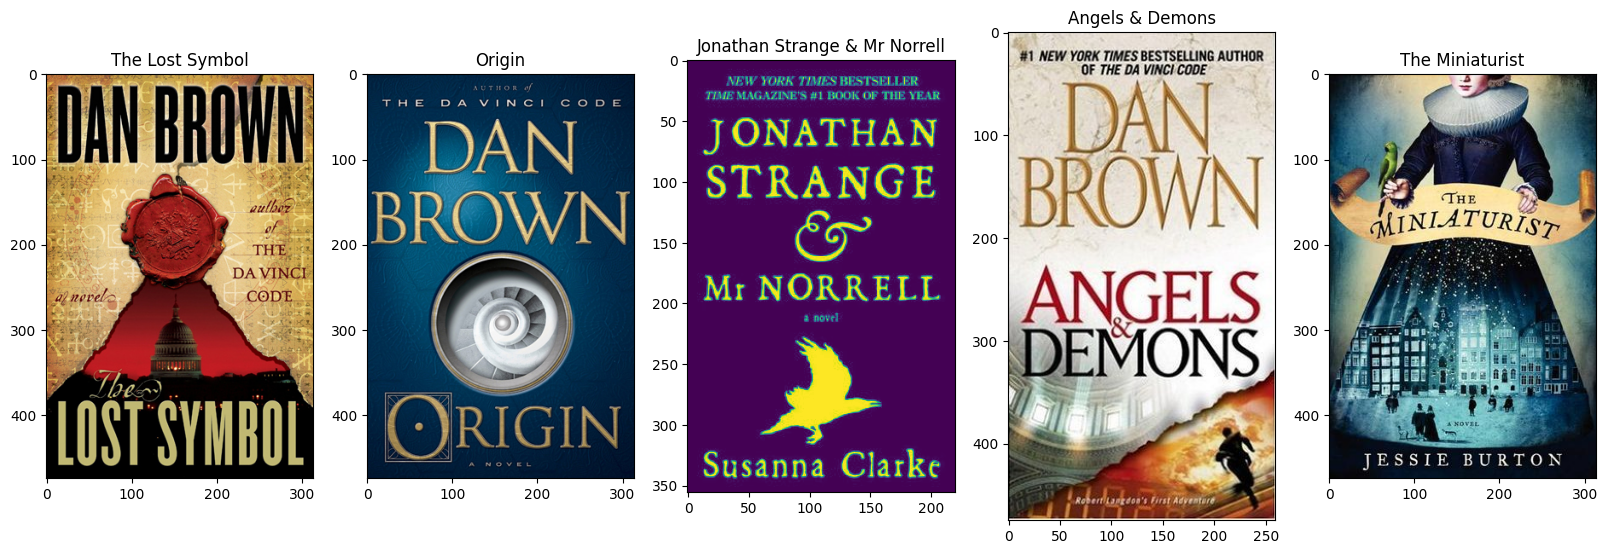

In [26]:
recommendations('The Da Vinci Code')